# Under the hood of matplotlib

Understanding how a tool works gives us far more flexibility in applying it. The power of matplotlib is its customizability, but you can do the most with it if you're familiar with how it represents plot content.

Matplotlib evolved from an attempt to create an open source alternative to MATLAB, which was (and is) a popular, proprietary software platform for computational programming and data visualization.

You can think of how matplotlib works as having a canvas (a Figure) on which you can add content. Everything shown on a Figure is the result of what's known as an `Artist` object. An artist is able to make the plots, axes, text, etc., that we want to place on our figure.

Everytime we call a plotting function that places something onto the figure, it returns an artist. Let's save the output of `ax.plot()` as `lines`. In the example below, `lines` is our Artist object that draws the lines on the plot.

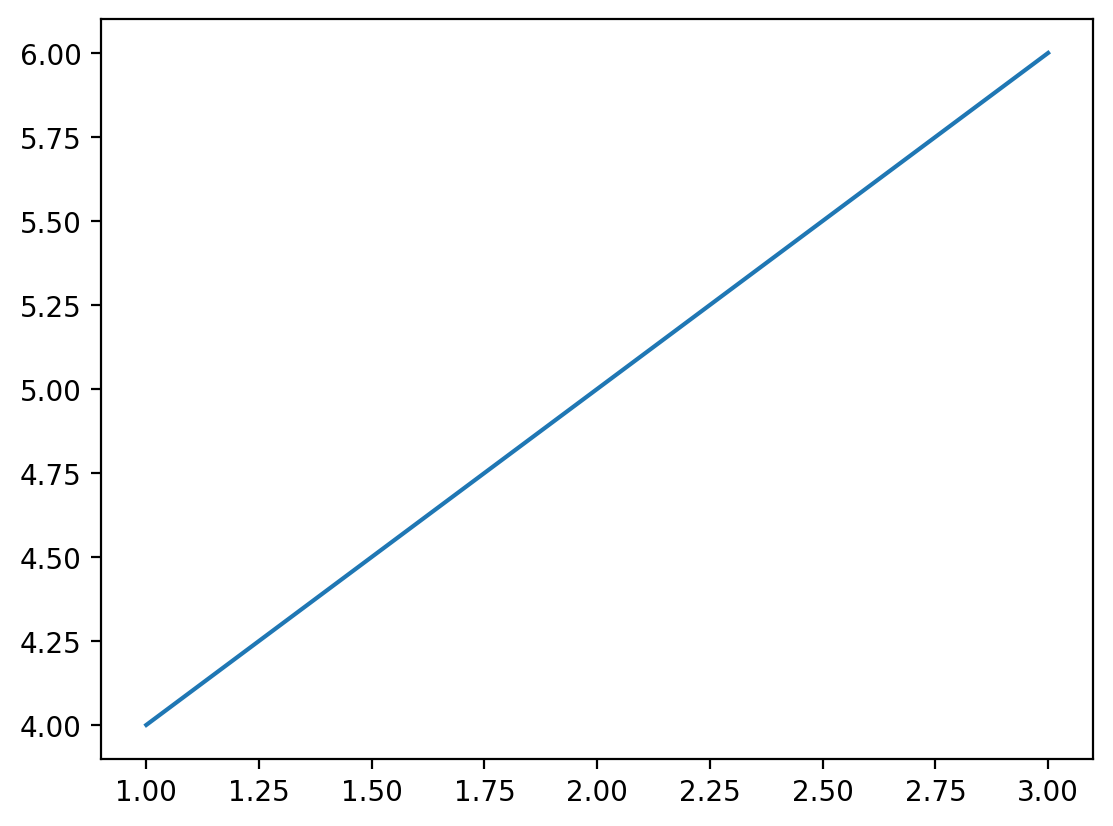

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lines = ax.plot([1,2,3],[4,5,6])
lines

The `plot` returns a list of Artists who's first entry is `<matplotlib.lines.Line2D at 0x12a46ac90>`, which is a `Line2D` artist. The Line2D Artist is the only one since we just made that one plot. In this case, the `Lines2D` artist draws a two-dimensional collection of lines on an axes object. Each Artist has properties. Let's take a look at the `Lines2D` properties - we can do this with the `getp` (get properties) method for matplotlib.

We need to access the artist using `lines[0]` since the `plot` method returns a *list* of `Line2D` artists (with one element in the list), so we need to access the first element in the list.

In [2]:
plt.getp(lines[0])

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    bbox = Bbox(x0=1.0, y0=4.0, x1=3.0, y1=6.0)
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([1, 2, 3]), array([4, 5, 6]))
    drawstyle or ds = default
    figure = Figure(640x480)
    fillstyle = full
    gapcolor = None
    gid = None
    in_layout = True
    label = _child0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    mouseover = False
    path = Path(array([[1., 4.],        [2., 5.],        [3.,...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = Non

There are MANY properties here, and you can learn more about these in the [Line2D matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html). You can also set or change these using code which can change the line that's drawn in terms of its color, size, markerstyle, etc. If you ever want to know what you can and cannot change, simply call `getp()` to figure out what your options are. Let's note a few of these properties and explore how to change them for this Line2D artist as an example:

- color or c = #1f77b4
- linestyle or ls = -
- linewidth or lw = 1.5
- marker = None
- markeredgecolor or mec = #1f77b4
- markeredgewidth or mew = 1.0
- markerfacecolor or mfc = #1f77b4
- markersize or ms = 6.0

We can set any number of these with the `setp` (set properties) function in the same way we used `getp`. Let's try this by going wild and changing all the properties above:

Text(0.5, 1.0, 'My Plot')

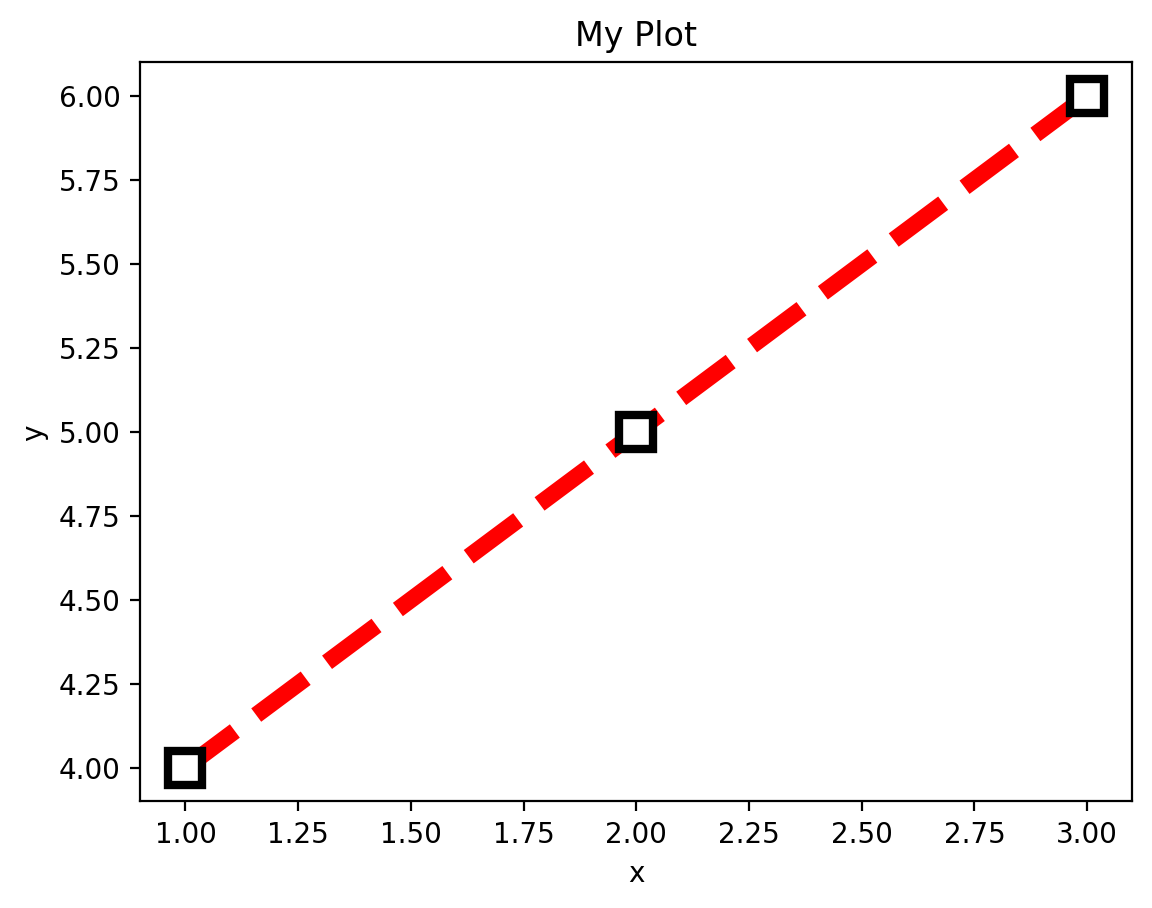

In [3]:
fig, ax = plt.subplots()
lines = ax.plot([1,2,3],[4,5,6])
plt.setp(lines, 
         color='red',
         linestyle= '--',
         linewidth=6,
         marker='s',
         markeredgecolor='black',
         markeredgewidth=3.0,
         markerfacecolor='white',
         markersize=12.0,
         label='My line')

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('My Plot')


Lines are not the only Artists in matplotlib, here's a list of the artists you've already encountered in your plots:

| Artist | Axes helper method to create the Artist |
| -- | -- |
| `Line2D` | `ax.plot()` |
| `PolyCollection` | `ax.scatter()` |
| `Rectangle` | `ax.bar()`  |
| `Legend` | `ax.legend()` |

But Artists are EVERYTHING on the plot including the Axes, XTick, YTick, etc. There is a hierarchy to these that you can access and then modify any parts of the plot that you'd like.



Similarly, figures and axes are Artists and we can get their properties. Let's take a look at the Axes Artist properties:

In [4]:
plt.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.lines.Line2D object at 0x12a53e1b0>, ...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 0.9999999999999998
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x12a4e2810>, ...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(640x480)
    frame_on = True
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([<matplotlib.lines.Line2D object at 0x12a53e1b0>]...
    lines = <a list of 1 Line2D objects>
    mouseover = False
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125,

This has a TON of properties, but they all describe aspects of the figure including the figure it resides in ('figure'), the x- and y-tick labels (xticklabels and yticklabels), etc. Axes CONTAIN all of the Artists objects associated with a single plot. This hierarchical relationship makes the Axes the 'parent' object and each Artist component the 'child' object.  Now let's specifically see what the children of this Axes object are. So that we can talk about each one, let's make a couple of tweaks to the plot, adding some additional titles, and coloring the center of the plot in light blue:

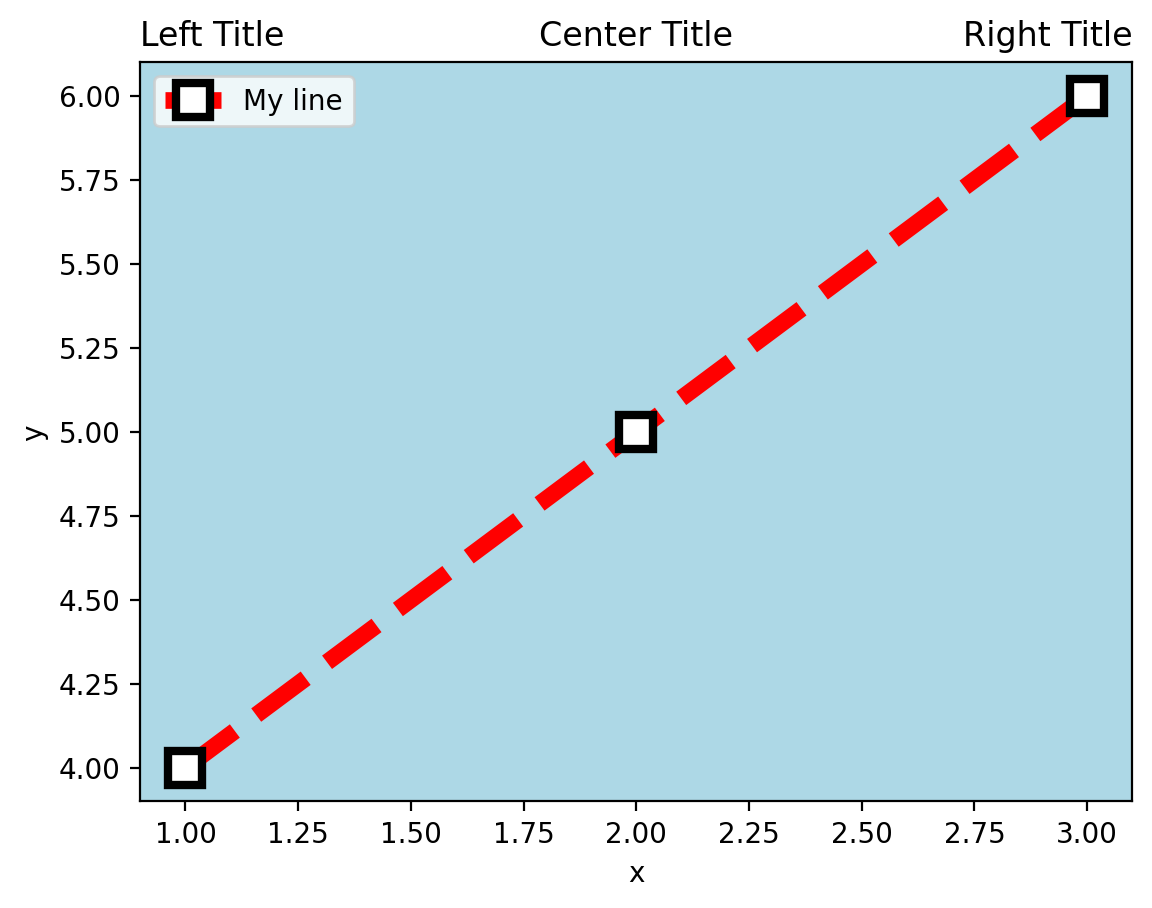

In [67]:
fig, ax = plt.subplots()
lines = ax.plot([1,2,3],[4,5,6])
plt.setp(lines, 
        color='red',
        linestyle= '--',
        linewidth=6,
        marker='s',
        markeredgecolor='black',
        markeredgewidth=3.0,
        markerfacecolor='white',
        markersize=12.0,
        label='My line')

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Center Title')
ax.set_title('Left Title', loc='left') # Title on the left
ax.set_title('Right Title', loc='right') # Title on the right
ax.set_facecolor('lightblue') # Sets the color of the center of the plot

Now, let's get the children of the Axes object:

In [68]:
plt.get(ax,'children')

 Text(0.5, 1.0, 'Center Title'),
 Text(0.0, 1.0, 'Left Title'),
 Text(1.0, 1.0, 'Right Title'),

This is a set of ALL of the components of our figure. The Line2D, as we already know, is our plotted line. The `Spine` elements are the lines representing lines bordering the axis (not including the ticks and tick labels). The XAxis and YAxis represent the corresponding ticks and tick labels, the text elements represent the possible placements of the title (left, center, or right), and finally, the rectangular patch represent the box area inside the plot (which we shaded light blue in this example to demonstrate these concepts).

For example, if we set the spines to not be visible (Artists 1,2,3,4 in the list above) and the blue rectangle (Artist 10 in the list above), we can remove them from the plot:

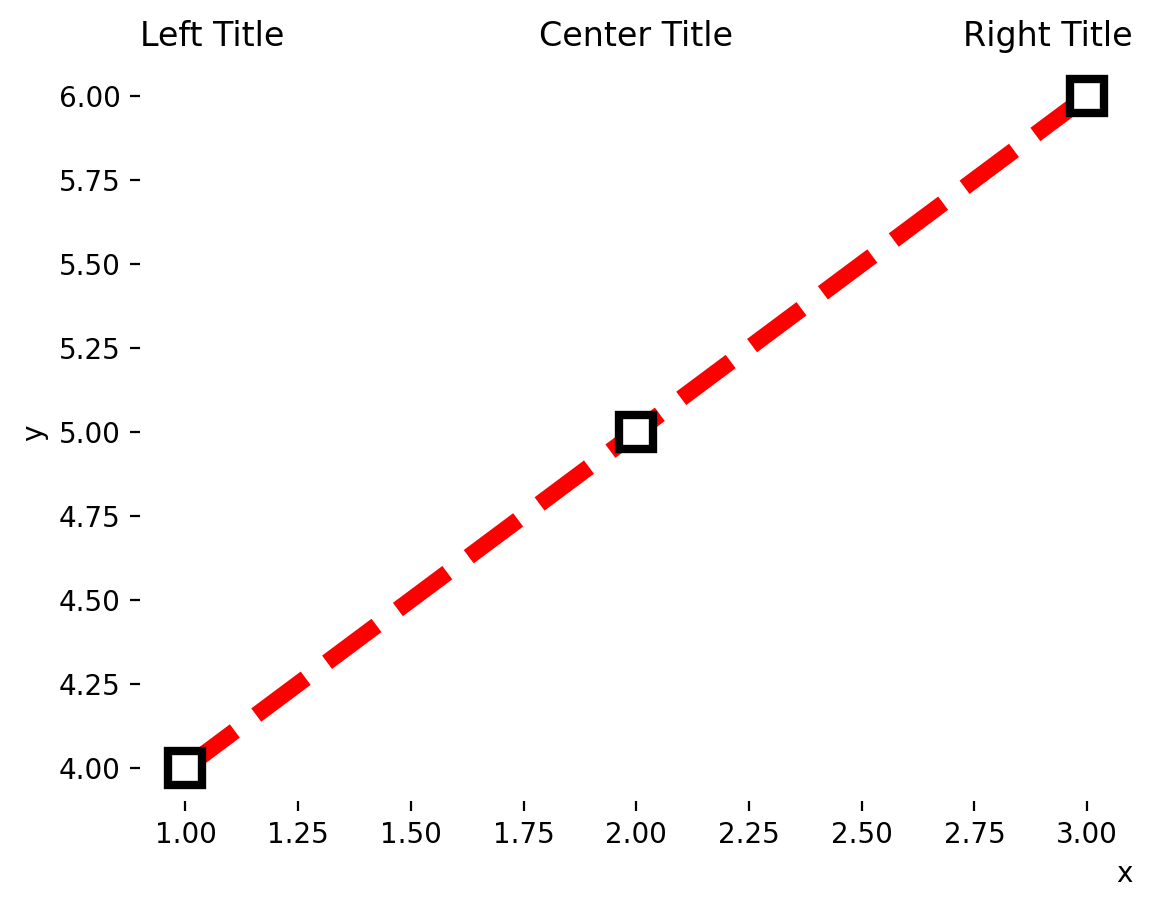

In [60]:
fig, ax = plt.subplots()
lines = ax.plot([1,2,3],[4,5,6])
plt.setp(lines, 
        color='red',
        linestyle= '--',
        linewidth=6,
        marker='s',
        markeredgecolor='black',
        markeredgewidth=3.0,
        markerfacecolor='white',
        markersize=12.0,
        label='My line')

ax.set_ylabel('y')
ax.set_xlabel('x', loc='right')
ax.set_title('Center Title')
ax.set_title('Left Title', loc='left') # Title on the left
ax.set_title('Right Title', loc='right') # Title on the right
ax.set_facecolor('lightblue') # Sets the color of the center of the plot

artists_to_remove = [1,2,3,4,10]
children_list = plt.get(ax,'children')
for artist in artists_to_remove:
    plt.setp(children_list[artist],visible=False)

In [61]:
plt.getp(item,'text')

''

So much of customizing plots is identifying plot elements and setting their properties. Sometimes we may need to iterate through a list of Line2D objects, or find the right child of an Artist to accomplish what we desire in the plot, but it's typically achievable.

What can sometime be confusing is that Artists may be GROUPS of other artists. Let's consider the XAxis in the above plot. It was the 6th element (index 5) in the list of children of the Axes object, and can also be accessed using the `ax.xaxis` accessor, which we can see points to the same thing:

In [62]:
plt.get(ax,'children')[5]

In [63]:
ax.xaxis

Let's get the children of this element:

In [64]:
plt.getp(ax.xaxis,'children')

[Text(1, 48.0, 'x'),
 Text(1, 50.77777777777778, ''),

These represent the x-axis label (the first text element), and each of the ticks, which if we look at the children of the first XTick, we see that it consists of the lines that form the ticks themselves and the tick labels themselves:

In [45]:
plt.get(plt.get(ax.xaxis,'children')[2],'children')

 Text(0.75, 0, '0.75'),
 Text(0.75, 1, '0.75')]

We can summarize all of this in the figure below, showing that each plot is made up of a hierarchy of Artists, each of which is built on collections of lines, polygons and text if you drill down far enough.

![Hierarchy of matplotlib](img/5.1-matplotlib-hierarchy.png)]

We realize this is a lot of the mechanics of matplotlib. Often, errors result from not understanding how plots are formed and where properties need to be set to change components of the plot. If you want to change the color of the title of the plot, you need to set the color property for the text Artist to do so. You can't set that in the function to create the plot itself.

## Takeaways

- Understanding how matplotlib is structured "under the hood" allows you to better-understand how to use this tool and customize it.
- Nearly all of the matplotlib objects you create be they lines, text, or otherwise, are typically Artists, which you can get the properties of with the `getp` method to determine what can be adjusted. You can use this if you're ever unsure of what can be changed about a particular component on the plot. Simple use the `artist = ax.<method>()` construct and then run `plt.getp(artist)` to get your list of properties (e.g. for line plots: `artist=ax.plot(x,y)` and `plt.getp(artist)`)
- In many cases, you won't need to dive this deeply, but having an understanding of the structure of matplotlib is empowering for innovation and creativity.

## References

John Hunter and Michael Droettboom. The Architecture of Open Source Applications (Volume 2). Chapter 11: matplotlib. 2012. Available at [https://aosabook.org/en/v2/matplotlib.html]()
